<a href="https://colab.research.google.com/github/Sudeshk22/Deeplearning-recommendation-system-for-research--paper/blob/main/Handwriting_recognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.8883 - loss: 0.3536 - val_accuracy: 0.9838 - val_loss: 0.0555
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9837 - loss: 0.0513 - val_accuracy: 0.9862 - val_loss: 0.0481
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9891 - loss: 0.0340 - val_accuracy: 0.9863 - val_loss: 0.0449
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9931 - loss: 0.0222 - val_accuracy: 0.9883 - val_loss: 0.0452
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9877 - val_loss: 0.0463
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9955 - loss: 0.0126 - val_accuracy: 0.9898 - val_loss: 0.0403
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9969 - loss: 0.0096 - val_accuracy: 0.9894 - val_loss: 0.0463
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9974 -

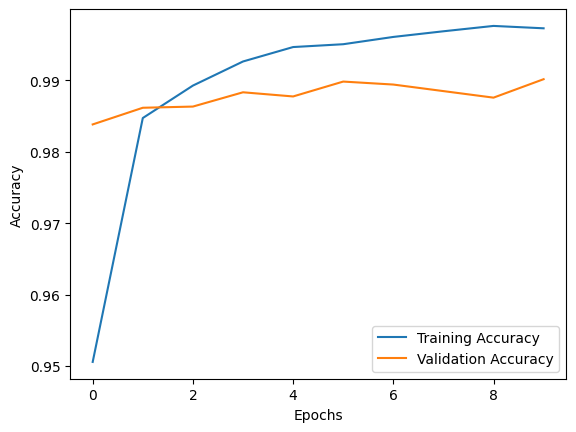

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
x_train = x_train.reshape(-1, 28, 28, 1)  # Add channel dimension
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
